In [18]:
pip install statsmodels.api

ERROR: Could not find a version that satisfies the requirement statsmodels.api (from versions: none)
ERROR: No matching distribution found for statsmodels.api
Note: you may need to restart the kernel to use updated packages.


In [6]:
# import packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Include this to have plots show up in your Jupyter notebook.
%matplotlib inline 

# For the Hull logit
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

In [7]:
loans = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/loan_data.csv', index_col=0)  

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29092 entries, 1 to 29092
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_status     29092 non-null  int64  
 1   loan_amnt       29092 non-null  int64  
 2   int_rate        26316 non-null  float64
 3   grade           29092 non-null  object 
 4   emp_length      28283 non-null  float64
 5   home_ownership  29092 non-null  object 
 6   annual_inc      29092 non-null  float64
 7   age             29092 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.0+ MB


In [ ]:
loans.describe() #not showing me any objects, needs better format

,loan_status,loan_amnt,int_rate,emp_length,annual_inc,age
count,29092.000000,29092.000000,26316.000000,28283.000000,2.909200e+04,29092.000000
mean,0.110924,9593.505947,11.004567,6.145282,6.716883e+04,27.702117
std,0.314043,6323.416157,3.239012,6.677632,6.360652e+04,6.231927
min,0.000000,500.000000,5.420000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,7.900000,2.000000,4.000000e+04,23.000000
50%,0.000000,8000.000000,10.990000,4.000000,5.642400e+04,26.000000
75%,0.000000,12250.000000,13.470000,8.000000,8.000000e+04,30.000000
max,1.000000,35000.000000,23.220000,62.000000,6.000000e+06,144.000000


In [10]:
list_str_obj_cols = loans.columns[loans.dtypes == 'object'].tolist() 
for str_obj_col in list_str_obj_cols:
    loans[str_obj_col] = loans[str_obj_col].astype('category')

loans.dtypes

loan_status          int64
loan_amnt            int64
int_rate           float64
grade             category
emp_length         float64
home_ownership    category
annual_inc         float64
age                  int64
dtype: object

In [11]:
loans['grade'].value_counts()

grade
A    9649
B    9329
C    5748
D    3231
E     868
F     211
G      56
Name: count, dtype: int64

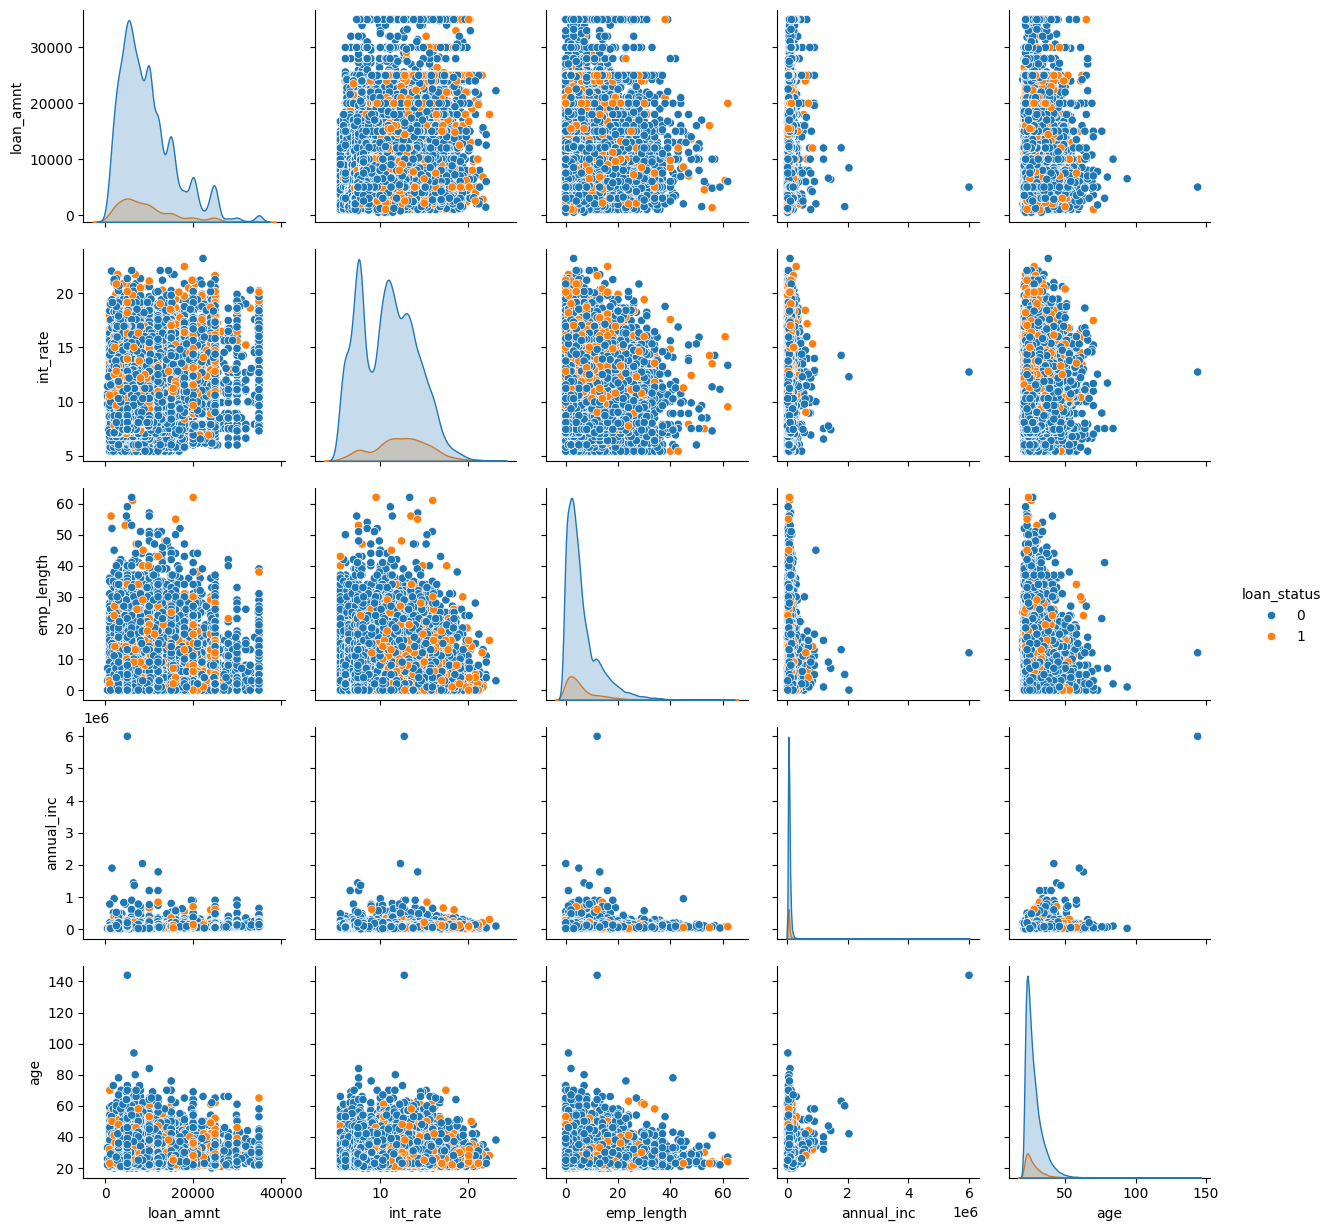

In [12]:
sns.pairplot(loans, hue='loan_status');

In [13]:
loans = loans[loans['annual_inc'] < 6000000]
loans = loans[loans['age'] < 144]

loans = loans.dropna()

loans.describe(include='all')

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age
count,25570.000000,25570.000000,25570.000000,25570,25570.000000,25570,2.557000e+04,25570.000000
unique,NaN,NaN,NaN,7,NaN,4,NaN,NaN
top,NaN,NaN,NaN,A,NaN,RENT,NaN,NaN
freq,NaN,NaN,NaN,8412,NaN,13015,NaN,NaN
mean,0.109190,9655.154478,11.034409,NaN,6.127219,NaN,6.750489e+04,27.695190
std,0.311884,6324.540307,3.228964,NaN,6.653610,NaN,5.214082e+04,6.163362
min,0.000000,500.000000,5.420000,NaN,0.000000,NaN,4.000000e+03,20.000000
25%,0.000000,5000.000000,7.900000,NaN,2.000000,NaN,4.000000e+04,23.000000
50%,0.000000,8000.000000,10.990000,NaN,4.000000,NaN,5.700600e+04,26.000000
75%,0.000000,12500.000000,13.480000,NaN,8.000000,NaN,8.000400e+04,30.000000


In [14]:
results_ols = smf.ols("loan_status ~ annual_inc", data=loans).fit()
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     67.76
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.93e-16
Time:                        12:39:37   Log-Likelihood:                -6455.7
No. Observations:               25570   AIC:                         1.292e+04
Df Residuals:                   25568   BIC:                         1.293e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1300      0.003     40.781      0.0

RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

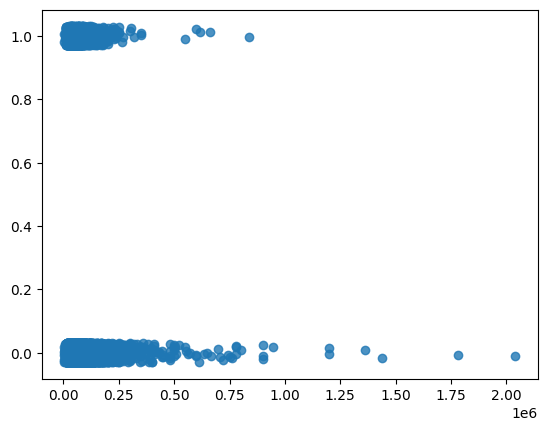

In [16]:
sns.regplot(x="annual_inc", y="loan_status", data=loans, logistic=True, y_jitter=.03)
plt.ylabel("Probability of default");

In [19]:
results_ols = smf.ols("loan_status ~ annual_inc + home_ownership", data=loans).fit()
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     21.92
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           4.44e-18
Time:                        12:44:52   Log-Likelihood:                -6445.8
No. Observations:               25570   AIC:                         1.290e+04
Df Residuals:                   25565   BIC:                         1.294e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [20]:
results_logit = smf.logit("loan_status ~ home_RENT", data = loans).fit()
print(results_logit.summary())

PatsyError: Error evaluating factor: NameError: name 'home_RENT' is not defined
    loan_status ~ home_RENT
                  ^^^^^^^^^